In [1]:
import matplotlib
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#  #한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf" # Windows
# font_location = "/System/Library/fonts/AppleSDGothicNeo.ttc"  # Mac OS
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
crimes = pd.read_csv('nightlife_crime.csv', encoding='euc-kr')
crimes.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


In [4]:
#산점도 그리기 함수
def get_plot(x, y):
    temp = crimes.loc[:, (x,y)]
    plt.plot(temp[x], temp[y], 'bo')
    plt.title('%s 와 %s의 산점도' %(x,y))
    plt.xlabel(x)
    plt.ylabel(y)
    return plt.show()

In [5]:
#피어슨 상관계수 함수
def get_pearson_value(x,y):
    temp = crimes.loc[1:, (x,y)]
    return temp.corr(method='pearson')

# 지역별 청소년 범죄 건수 - ing

In [6]:
cols = ['murder','robbery','forcible_rape','thef','violence']
crimes_per_region = crimes[cols].sum(axis = 1, numeric_only=True)

my_data = crimes[cols]
my_data

,murder,robbery,forcible_rape,thef,violence
0,0,6,19,140,176
1,0,3,6,193,158
2,0,0,9,166,210
3,0,3,9,273,240
4,0,2,14,170,209
5,0,0,29,155,153
6,0,1,3,157,194
7,0,0,7,146,66
8,0,6,14,227,337
9,0,6,21,126,107


# 청소년 범죄 유형 비율 - done

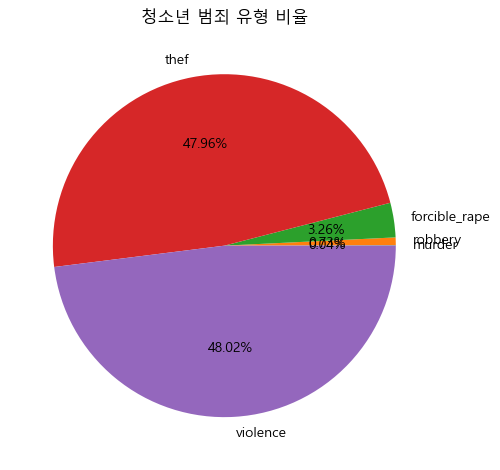

In [7]:
cols = ['murder','robbery','forcible_rape','thef','violence']
teens_crime_types_sum = crimes[cols].sum(axis = 0, numeric_only=True)
#print(teens_crime_types_sum)

teens_crime_types_sum.plot.pie(
    y = teens_crime_types_sum.index,
    shadow = False,
    autopct='%.2f%%',
)
plt.title('청소년 범죄 유형 비율')
plt.tight_layout()
plt.show()

청소년 범죄 유형에는 폭력이 가장 많았고, 그 뒤를 잇는 것은 절도입니다

# 범죄별 청소년 가해자 비율 - done

murder 범죄에서 청소년이 차지하는 비율 : 2.05%
robbery 범죄에서 청소년이 차지하는 비율 : 19.92%
forcible_rape 범죄에서 청소년이 차지하는 비율 : 4.69%
thef 범죄에서 청소년이 차지하는 비율 : 6.93%
violence 범죄에서 청소년이 차지하는 비율 : 5.82%


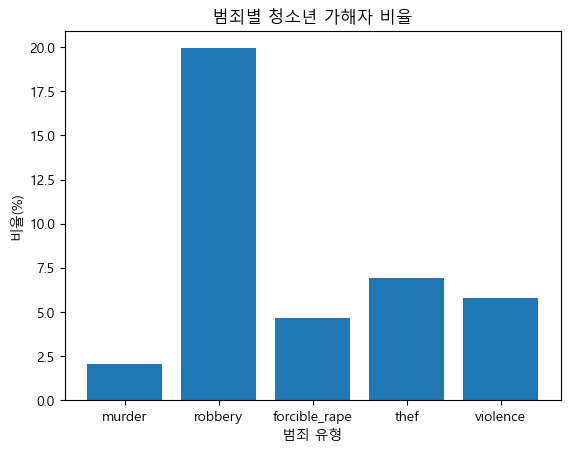

In [8]:
cols = ['murder','robbery','forcible_rape','thef','violence']
cols_tot = ['murder_tot', 'robbery_Tot','forcible_rape_Tot','thef_tot','violence_Tot']
teens_crime_types_sum = crimes[cols].sum(axis = 0, numeric_only=True)
tot_crime_types_sum = crimes[cols_tot].sum(axis=0, numeric_only=True)

ratio = teens_crime_types_sum.values / tot_crime_types_sum.values
for idx in range(len(cols)):
    print("%s 범죄에서 청소년이 차지하는 비율 : %.2f%%" %(cols[idx], ratio[idx]*100))
plt.bar(cols, ratio*100)
plt.xlabel('범죄 유형')
plt.ylabel('비율(%)')
plt.title('범죄별 청소년 가해자 비율')
plt.show()

범죄 별 청소년 가해자 비율을 분석했을 때 robbery 가 가장 많은 것으로 나타난다. 다만, 전체 robbery 범죄 발생 건 수가 많은 편은 아니다.
따라서, 범죄 유형 마다 청소년 가해자 비율에 대해 이야기 하고자 한다면, 

# 청소년 절도와 폭행 발생 수의 관계 - done

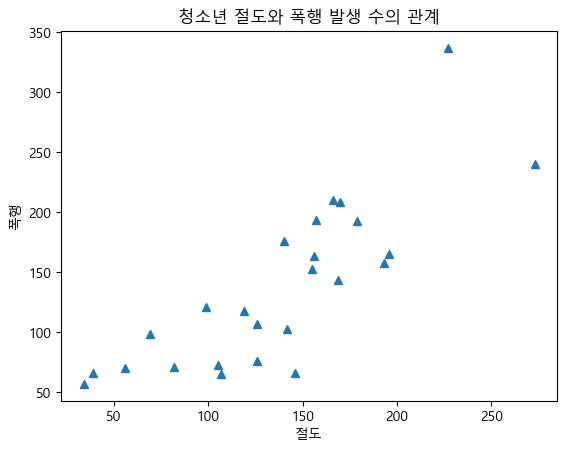

In [9]:
plt.plot(crimes['thef'], crimes['violence'], '^')
plt.xlabel('절도')
plt.ylabel('폭행')
plt.title('청소년 절도와 폭행 발생 수의 관계')
plt.show()

# nightlife 수와, 청소년 범죄 발생 수의 관계 - done

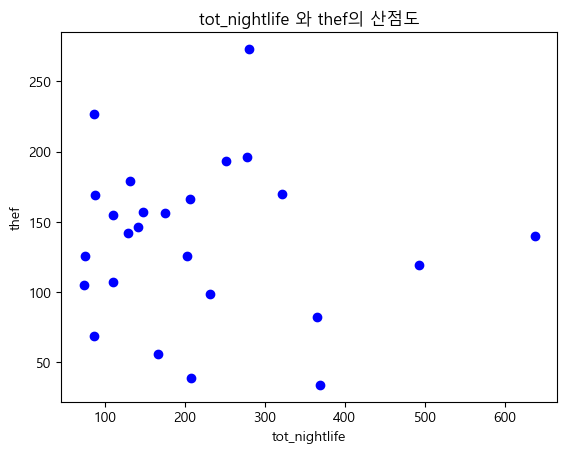

               tot_nightlife      thef
tot_nightlife       1.000000 -0.091191
thef               -0.091191  1.000000


In [10]:
totn_and_thef = crimes.loc[:,('tot_nightlife', 'thef')]
import seaborn as sns

get_plot('tot_nightlife', 'thef')
print(get_pearson_value('tot_nightlife', 'thef'))

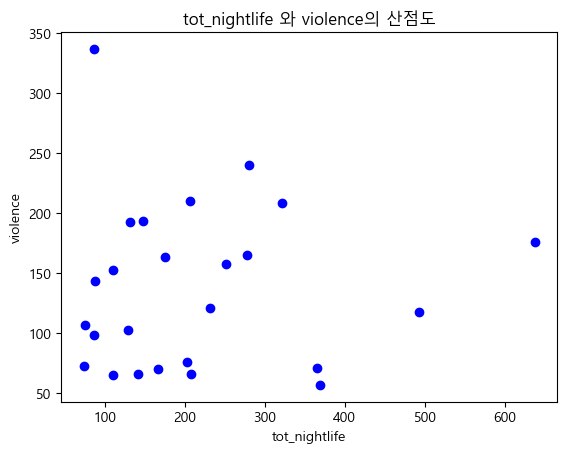

               tot_nightlife  violence
tot_nightlife       1.000000 -0.065278
violence           -0.065278  1.000000


In [11]:
totn_and_violence = crimes.loc[:, ('tot_nightlife', 'violence')]
get_plot('tot_nightlife', 'violence')
print(get_pearson_value('tot_nightlife','violence'))

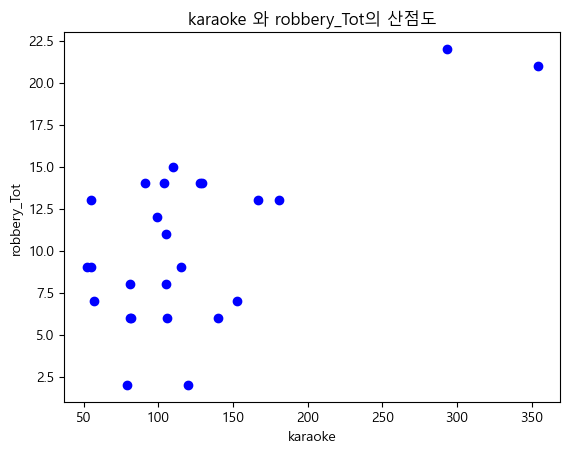

              karaoke  robbery_Tot
karaoke      1.000000     0.536771
robbery_Tot  0.536771     1.000000


In [12]:
totn_and_robbery = crimes.loc[:, ('karaoke', 'robbery_Tot')]
get_plot('karaoke', 'robbery_Tot')
print(get_pearson_value('karaoke','robbery_Tot'))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\AppData\Local\Temp\ipykernel_10036\4131064059.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


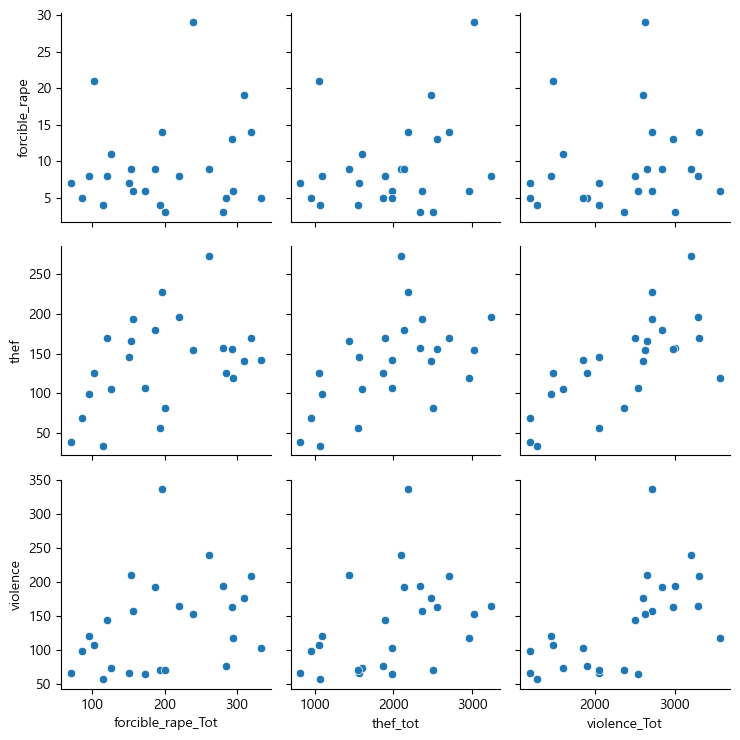

In [13]:
sns.pairplot(
    crimes, 
    x_vars=['forcible_rape_Tot','thef_tot','violence_Tot'],
    y_vars=['forcible_rape', 'thef', 'violence']
)
plt.tight_layout()
plt.show()

ToDo : 탐색적 데이터 분석 해보기<br>

ToDo: 